**LOANTAP CASE STUDY**

**Context:**

LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:

Personal Loan
EMI Free Loan
Personal Overdraft
Advance Salary Loan
This case study will focus on the underwriting process behind Personal Loan only

Problem Statement:

Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

In [ ]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#loading the data
df=pd.read_csv('Loantap.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
#getting the number of rows and columns
df.shape

(396030, 27)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [ ]:
#checking for missing values
round(df.isnull().sum()/len(df)*100,2)

loan_amnt               0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
sub_grade               0.00
emp_title               5.79
emp_length              4.62
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
purpose                 0.00
title                   0.44
dti                     0.00
earliest_cr_line        0.00
open_acc                0.00
pub_rec                 0.00
revol_bal               0.00
revol_util              0.07
total_acc               0.00
initial_list_status     0.00
application_type        0.00
mort_acc                9.54
pub_rec_bankruptcies    0.14
address                 0.00
dtype: float64

In [ ]:
#filling null values with 'unknown' for object type
df['title'].fillna('Unknown',inplace=True)
df['emp_title'].fillna('Unknown',inplace=True)

In [ ]:
#filling missing values of mort_acc by total_acc mean value
avg=df.groupby('total_acc')['mort_acc'].transform('mean')
df['mort_acc'].fillna(avg,inplace=True)

In [ ]:
#dropping null values
df.dropna(axis=0,inplace=True)

In [ ]:
round(df.isnull().sum()/len(df)*100,2)

loan_amnt               0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_title               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
title                   0.0
dti                     0.0
earliest_cr_line        0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
initial_list_status     0.0
application_type        0.0
mort_acc                0.0
pub_rec_bankruptcies    0.0
address                 0.0
dtype: float64

In [ ]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,376929.000000,376929.000000,376929.000000,3.769290e+05,376929.000000,376929.000000,376929.000000,3.769290e+05,376929.000000,376929.000000,376929.000000,376929.000000
mean,14264.626826,13.637716,435.874478,7.539744e+04,17.296733,11.374460,0.172603,1.597964e+04,53.961622,25.482693,1.779502,0.117200
std,8374.474814,4.475179,251.195910,6.224031e+04,8.111768,5.144134,0.524977,2.068382e+04,24.420020,11.884231,2.058089,0.350677
min,500.000000,5.320000,16.080000,4.000000e+03,0.000000,1.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,254.120000,4.600000e+04,11.270000,8.000000,0.000000,6.106000e+03,36.100000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,379.630000,6.500000e+04,16.850000,11.000000,0.000000,1.130300e+04,55.000000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,572.980000,9.000000e+04,22.890000,14.000000,0.000000,1.978500e+04,73.000000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,380.530000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [ ]:
df.shape

(376929, 27)

# **EDA-Exploratory Data Analysis**

**Plotting categorical variables against loan-status**

<Figure size 800x400 with 0 Axes>

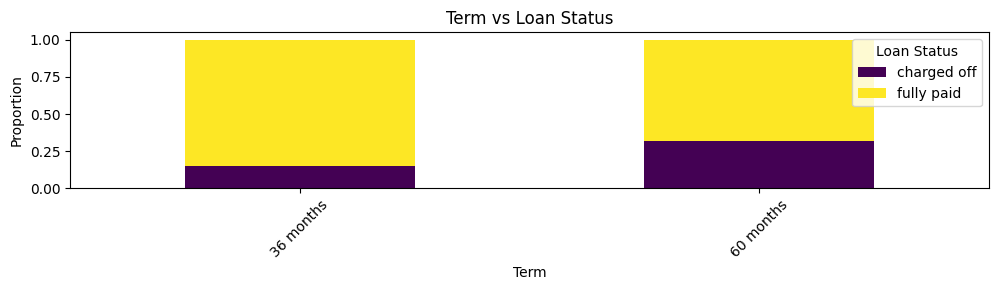

<Figure size 800x400 with 0 Axes>

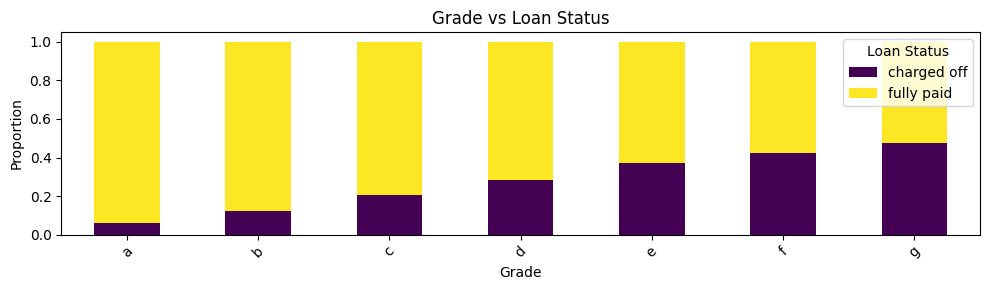

<Figure size 800x400 with 0 Axes>

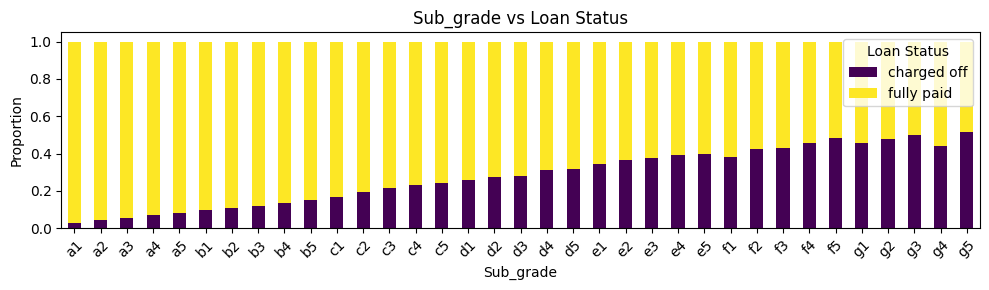

<Figure size 800x400 with 0 Axes>

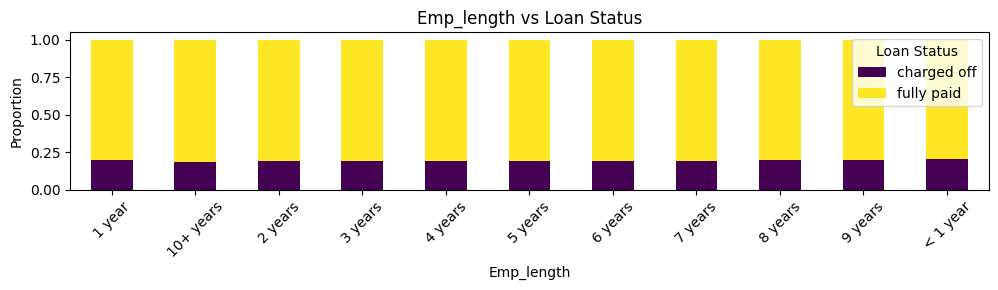

<Figure size 800x400 with 0 Axes>

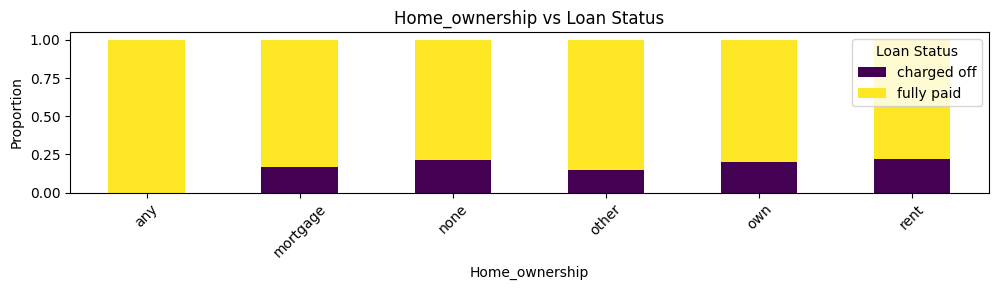

<Figure size 800x400 with 0 Axes>

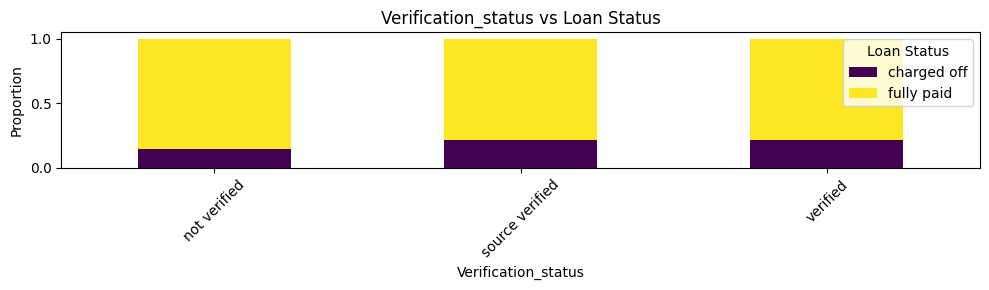

<Figure size 800x400 with 0 Axes>

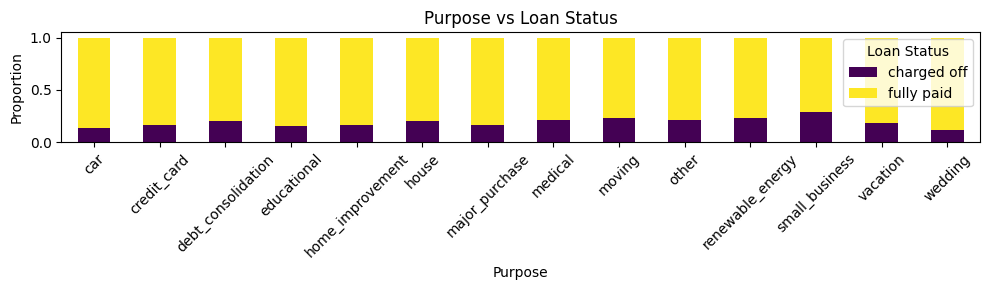

<Figure size 800x400 with 0 Axes>

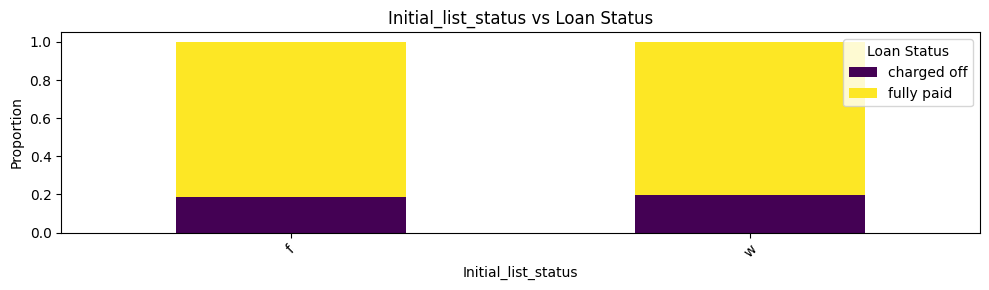

<Figure size 800x400 with 0 Axes>

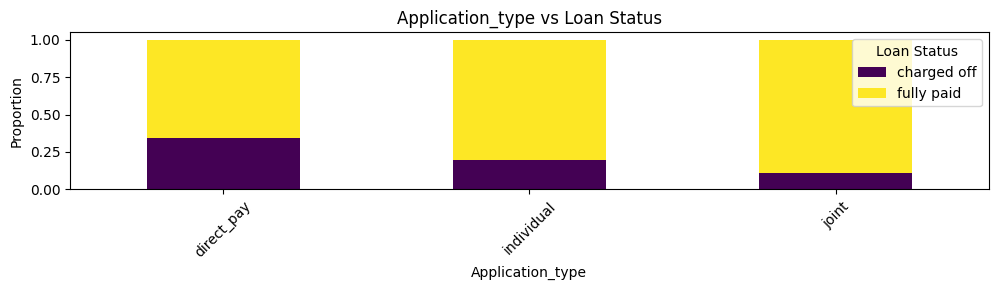

In [ ]:
columns_interest=['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status',
                  'purpose','initial_list_status', 'application_type']
for column in columns_interest:
    if column in df.columns:
        df[column] = df[column].astype(str).str.lower().str.strip()

# Creating stacked bar plots for categorical variables against 'loan_status'
for col in columns_interest:
    if col != 'loan_status':  # Exclude loan_status from plotting against itself
        plt.figure(figsize=(8, 4))
        ct = pd.crosstab(df[col], df['loan_status'])
        ct = ct.div(ct.sum(axis=1), axis=0)  # Convert counts to percentages for each category
        ct.plot(kind='bar', stacked=True, colormap='viridis',figsize=(10,3))
        plt.title(f'{col.capitalize()} vs Loan Status')
        plt.xlabel(f'{col.capitalize()}')
        plt.ylabel('Proportion')
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.legend(title='Loan Status', loc='upper right')
        plt.tight_layout()
        plt.show()


From above we observed,

1)Loan Term Impact: Loans with a 36-month term are more likely to be fully paid, while those with a 60-month term tend to have a higher incidence of being charged off.

2)Grade Impact: Loans with Grade A classification exhibit a lower rate of being charged off, whereas Grade G loans have a higher tendency to be charged off.

3)Employment Length Influence: Employment length does not appear to significantly impact the likelihood of a loan being charged off.

4)Home Ownership Influence: Specifically, individuals categorized as 'None' or 'Renters' in terms of home ownership demonstrate a higher probability of experiencing loan charge-offs.

5)Loan Purpose Impact: Loans allocated for 'Small Business' purposes exhibit a notably higher likelihood of being charged off compared to other purposes.

6)Application Type Impact: Specifically, loans categorized under the 'Direct Pay' application type display a higher tendency to be charged off compared to other application types.

<Figure size 1000x600 with 0 Axes>

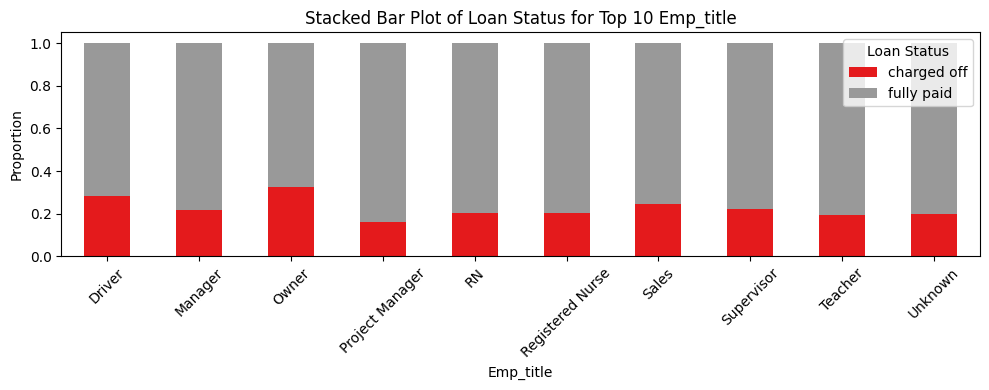

<Figure size 1000x600 with 0 Axes>

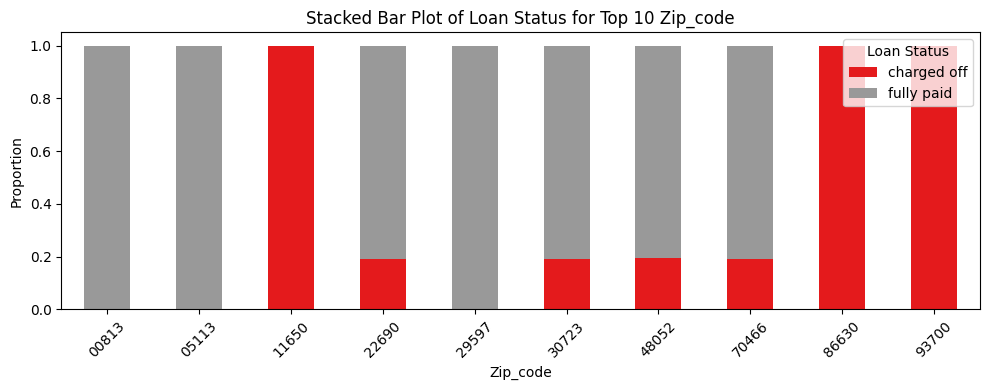

<Figure size 1000x600 with 0 Axes>

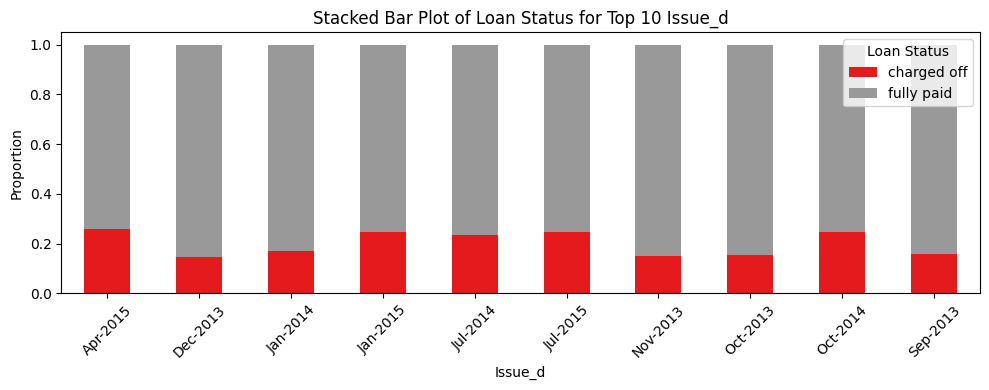

<Figure size 1000x600 with 0 Axes>

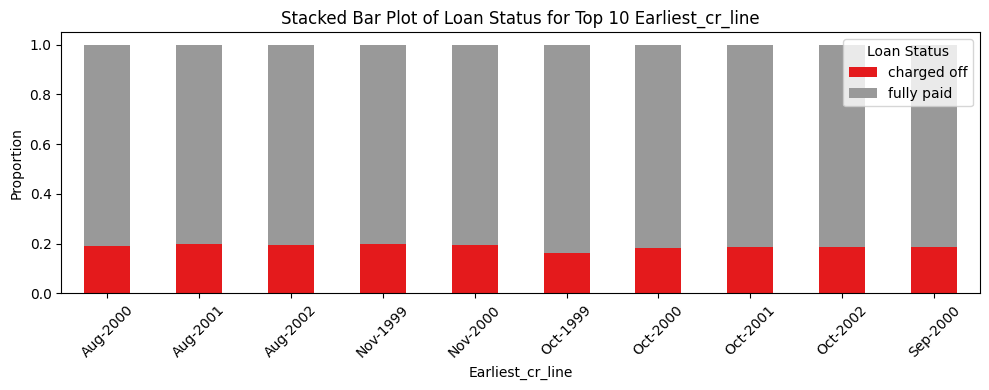

<Figure size 1000x600 with 0 Axes>

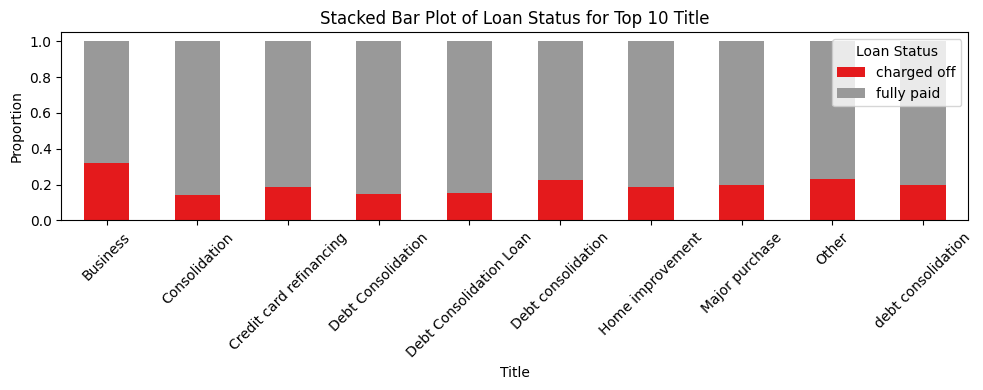

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting zip-code from the address column
df['zip_code'] = df['address'].apply(lambda x: x[-5:])
cols = ['emp_title', 'zip_code', 'issue_d', 'earliest_cr_line', 'title']

# Plotting stacked bar plots for top 10 loan_status for each column
for col in cols:
    # Get the top 10 values in the column
    top_10_values = df[col].value_counts().sort_values(ascending=False).head(10).index.tolist()

    # Filter the DataFrame for the top 10 values in the column
    filtered_data = df[df[col].isin(top_10_values)]

    # Create a crosstab to prepare data for stacked bar plot
    ct = pd.crosstab(filtered_data[col], filtered_data['loan_status'])
    ct = ct.div(ct.sum(axis=1), axis=0)  # Convert counts to proportions for each category

    # Plot stacked bar plot
    plt.figure(figsize=(10, 6))
    ct.plot(kind='bar', stacked=True, colormap='Set1', figsize=(10, 4))
    plt.title(f'Stacked Bar Plot of Loan Status for Top 10 {col.capitalize()}')
    plt.xlabel(f'{col.capitalize()}')
    plt.ylabel('Proportion')
    plt.legend(title='Loan Status')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


From above we observed,

1)Employment Title Impact: Individuals with the job title "Project Manager" exhibit a lower likelihood of experiencing loan charge-offs, whereas individuals classified as "Owners" show a higher impact on the probability of loans being charged off.

2)Zip Code Impact: Within specific zip codes such as 11650, 86630, and 93700, loans are observed to have a complete occurrence of being charged off, indicating a higher prevalence of full charge-offs within these particular geographical areas.

**Plotting numerical-variables against loan-status**

In [ ]:
#Feature Engeneering steps
# Creating flags based on conditions for Pub_rec, Mort_acc, and Pub_rec_bankruptcies
df['Pub_rec_flag'] = df['pub_rec'].apply(lambda x: 1 if x > 1.0 else 0)
df['Mort_acc_flag'] = df['mort_acc'].apply(lambda x: 1 if x > 1.0 else 0)
df['Pub_rec_bankruptcies_flag'] = df['pub_rec_bankruptcies'].apply(lambda x: 1 if x > 1.0 else 0)
df.drop(['pub_rec','mort_acc','pub_rec_bankruptcies'],axis=1,inplace=True)
# Displaying a sample of the modified DataFrame with new flags
print(df[['Pub_rec_flag','Mort_acc_flag','Pub_rec_bankruptcies_flag']].head())

   Pub_rec_flag  Mort_acc_flag  Pub_rec_bankruptcies_flag
0             0              0                          0
1             0              1                          0
2             0              0                          0
3             0              0                          0
4             0              0                          0


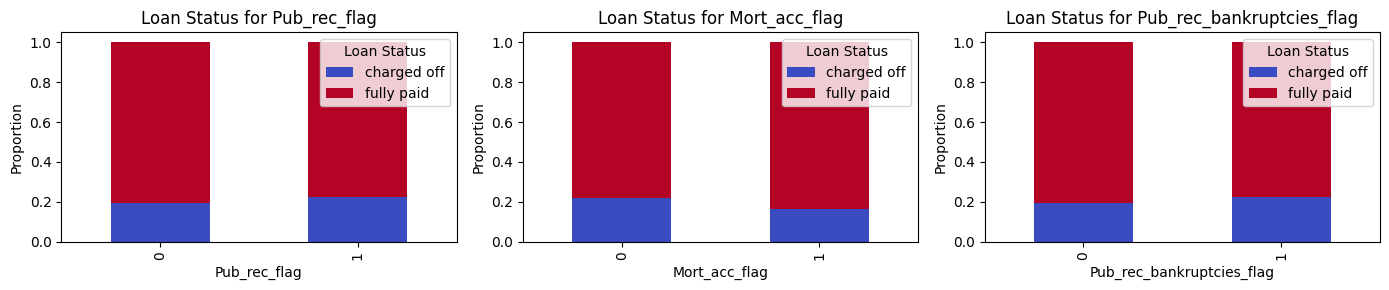

In [ ]:
# Extracting numerical variables from the DataFrame
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
# List of flag columns to plot against loan_status
flag_columns = ['Pub_rec_flag', 'Mort_acc_flag', 'Pub_rec_bankruptcies_flag']

# Creating subplots to display stacked bar plots for each flag column in one row
fig, axes = plt.subplots(1, len(flag_columns), figsize=(14, 3))

# Plotting stacked bar plots for each flag column against loan_status in a single row
for i, col in enumerate(flag_columns):
    # Create a crosstab to prepare data for stacked bar plot
    ct = pd.crosstab(df[col], df['loan_status'])
    ct = ct.div(ct.sum(axis=1), axis=0)  # Convert counts to proportions for each category

    # Plot stacked bar plot
    ct.plot(kind='bar', stacked=True, colormap='coolwarm', ax=axes[i])
    axes[i].set_title(f'Loan Status for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Proportion')
    axes[i].legend(title='Loan Status')

plt.tight_layout()
plt.show()

# **Outiler Detection and Treatment**

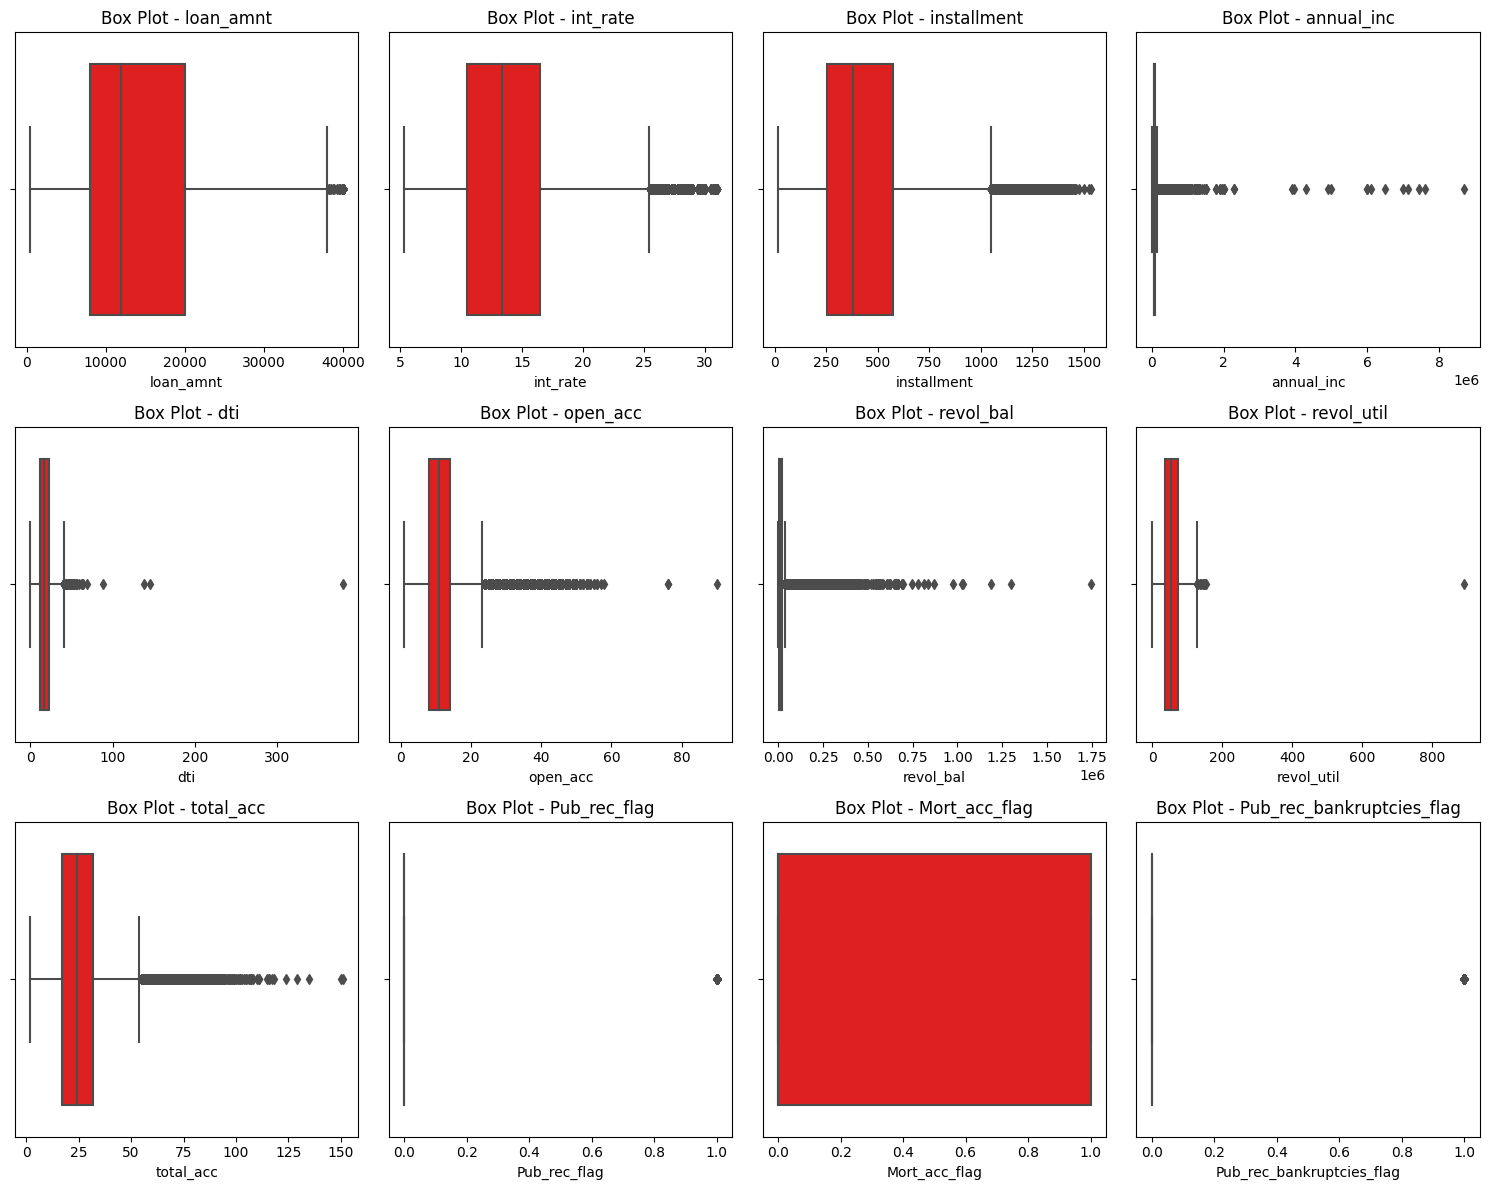

In [ ]:
# Creating box plots for each column
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 12))

for i, column in enumerate(numerical_columns):
    ax = axes[i // 4, i % 4]  # Selecting the subplot
    sns.boxplot(x=df[column], ax=ax,color='red')
    ax.set_title(f'Box Plot - {column}')
    ax.set_xlabel(column)

plt.tight_layout()
plt.show()

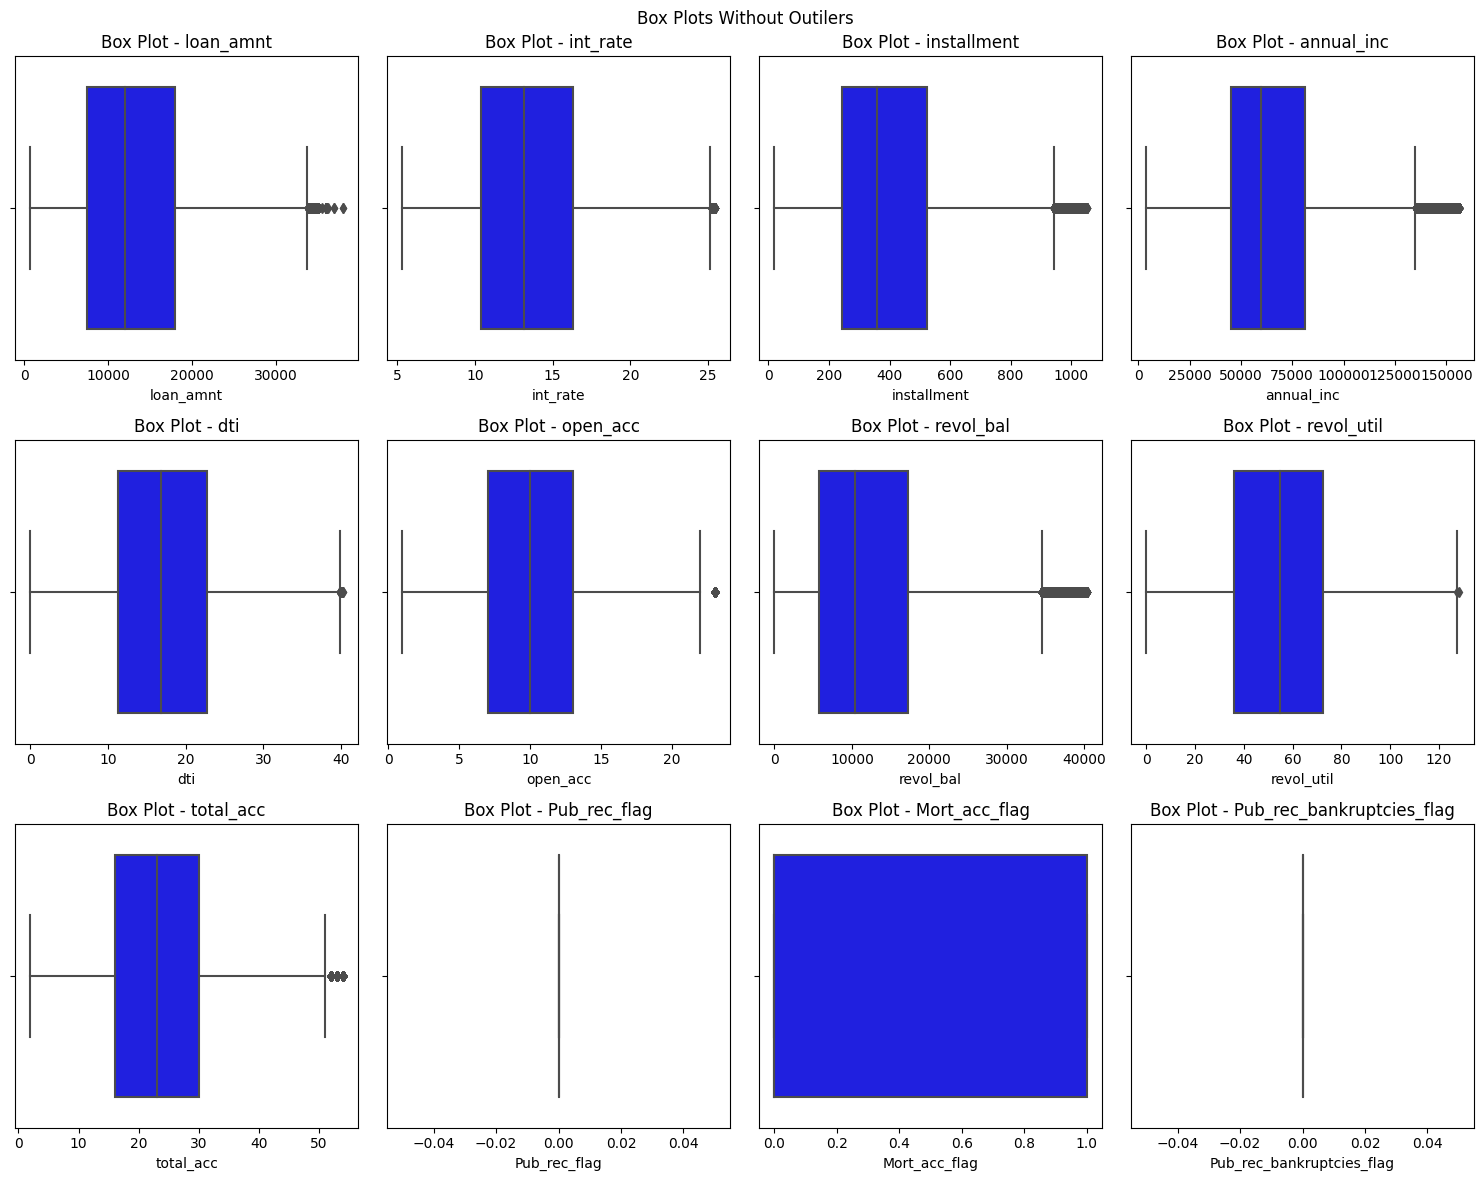

In [ ]:
q1 = df[numerical_columns].quantile(0.25)
q3 = df[numerical_columns].quantile(0.75)
IQR = q3 - q1
upper_limit = q3 + 1.5 * IQR
lower_limit = q1 - 1.5 * IQR
 # Creating a copy of the original DataFrame
for col in numerical_columns:
    df= df[(df[col] >= lower_limit[col]) & (df[col] <= upper_limit[col])]
# Creating box plots for each column after removing outliers
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 12))
for i, column in enumerate(numerical_columns):
    ax = axes[i // 4, i % 4]  # Selecting the subplot
    sns.boxplot(x=df[column], ax=ax,color='blue')
    plt.suptitle('Box Plots Without Outilers')
    ax.set_title(f'Box Plot - {column}')
    ax.set_xlabel(column)

plt.tight_layout()
plt.show()

# **Data Preprocessing**

In [ ]:
#Removing unneccessary columns
df.drop(['sub_grade','emp_title','emp_length','address','issue_d','title','earliest_cr_line'],axis=1,inplace=True)

In [ ]:
# Extracting the numeric part from strings in 'term'
df['term'] = df['term'].apply(lambda x: x.split()[0])

In [ ]:
#converting loan_status: fully_paid-0 and charged_off-1
df['loan_status']=df['loan_status'].apply(lambda x:0 if x=='fully paid' else 1)

In [ ]:
df['initial_list_status']=df['initial_list_status'].apply(lambda x:0 if x=='w' else 1)

In [ ]:
#one-hot encoding
cols_to_encode=['grade','home_ownership','verification_status','purpose','application_type','zip_code']
# One-hot encoding
df = pd.get_dummies(df, columns=cols_to_encode)

In [ ]:
pd.set_option('display.max_columns',None)
print(df.shape)
df.head()

(317222, 58)


,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,revol_bal,revol_util,total_acc,initial_list_status,Pub_rec_flag,Mort_acc_flag,Pub_rec_bankruptcies_flag,grade_a,grade_b,grade_c,grade_d,grade_e,grade_f,grade_g,home_ownership_any,home_ownership_mortgage,home_ownership_none,home_ownership_other,home_ownership_own,home_ownership_rent,verification_status_not verified,verification_status_source verified,verification_status_verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_direct_pay,application_type_individual,application_type_joint,zip_code_00813,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700
0,10000.0,36,11.44,329.48,117000.0,0,26.24,16.0,36369.0,41.8,25.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,65000.0,0,22.05,17.0,20131.0,53.3,27.0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,0,12.79,13.0,11987.0,92.2,26.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,54000.0,0,2.60,6.0,5472.0,21.5,13.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,55000.0,1,33.95,13.0,24584.0,69.8,43.0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


# **Logistic Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X=df.drop('loan_status',axis=1)
y=df['loan_status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.25,random_state=42)
print('X_train shape:',X_train.shape)
print('X_val shape:',X_val.shape)
print('X_test shape:',X_test.shape)

X_train shape: (190332, 57)
X_val shape: (63445, 57)
X_test shape: (63445, 57)


**Standardizing the data**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val=scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
#Model Building
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
print('Training accuracy:',model.score(X_train,y_train))
print('Validation accuracy:',model.score(X_val,y_val))
print('Testing accuracy:',model.score(X_test,y_test))

Training accuracy: 0.8924668474034845
Validation accuracy: 0.8908030577665694
Testing accuracy: 0.8924107494680432


**Hyperparameter Tuning**

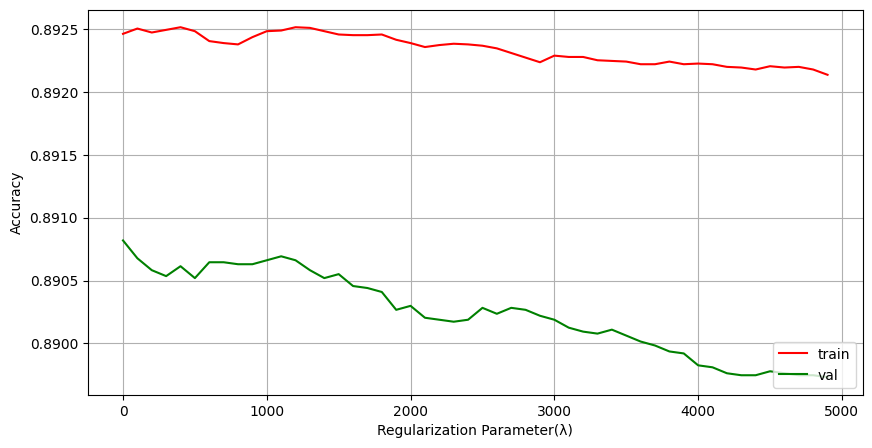

In [ ]:
from sklearn.pipeline import make_pipeline
train_scores=[]
val_scores=[]
scaler=StandardScaler()
lambda_values=np.arange(0.01,5000.0,100)
for la in lambda_values:
  scaled_lr=make_pipeline(scaler,LogisticRegression(C=1/la))
  scaled_lr.fit(X_train,y_train)
  train_score=scaled_lr.score(X_train,y_train)
  val_score=scaled_lr.score(X_val,y_val)
  train_scores.append(train_score)
  val_scores.append(val_score)
plt.figure(figsize=(10,5))
plt.plot(list(np.arange(0.01, 5000.0, 100)), train_scores, label="train",color='red')
plt.plot(list(np.arange(0.01, 5000.0, 100)), val_scores, label="val",color='green')
plt.legend(loc='lower right')
plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [ ]:
# Finding lambda value with maximum validation score
max_val_score_index = np.argmax(val_scores)
optimal_lambda = lambda_values[max_val_score_index]

print(f"The optimal lambda value for maximum validation score: {optimal_lambda}")

The optimal lambda value for maximum validation score: 0.01


In [ ]:
model=LogisticRegression(C=1/0.01,max_iter=1000)
model.fit(X_train,y_train)
print('Training accuracy:',model.score(X_train,y_train))
print('Validation accuracy:',model.score(X_val,y_val))
print('Testing accuracy:',model.score(X_test,y_test))

Training accuracy: 0.8924615934262237
Validation accuracy: 0.8908188194499173
Testing accuracy: 0.8924265111513909


**Checking whether data is balanced or not**

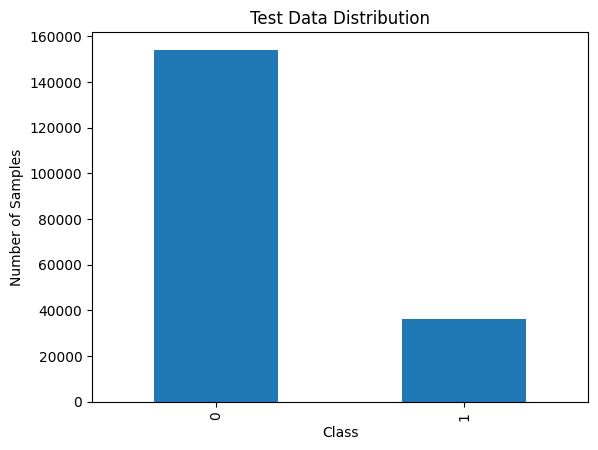

In [ ]:
y_train.value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Test Data Distribution')
plt.show()

---It seem's like data is imbalanced

**Smote Technique to make balance data**

In [ ]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smt = SMOTE(random_state=10)

X_sm, y_sm = smt.fit_resample(X_train, y_train)
print(f'Before sampling loan_status for label 0:{sum(y_train==0)}')
print(f'After sampling loan_status for label 0:{sum(y_sm==0)}')
print(f'Before sampling loan_status for label 0:{sum(y_train==1)}')
print(f'After sampling loan_status for label 0:{sum(y_sm==1)}')

Before sampling loan_status for label 0:154107
After sampling loan_status for label 0:154107
Before sampling loan_status for label 0:36225
After sampling loan_status for label 0:154107


**Model Performance Metrics**

---**Confusion Matrix**

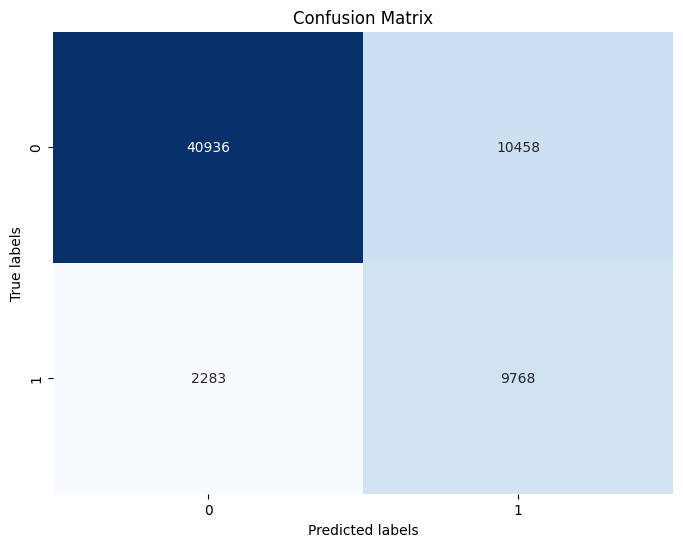

In [ ]:
from sklearn.metrics import confusion_matrix
model.fit(X_sm,y_sm)
y_pred=model.predict(X_test)
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

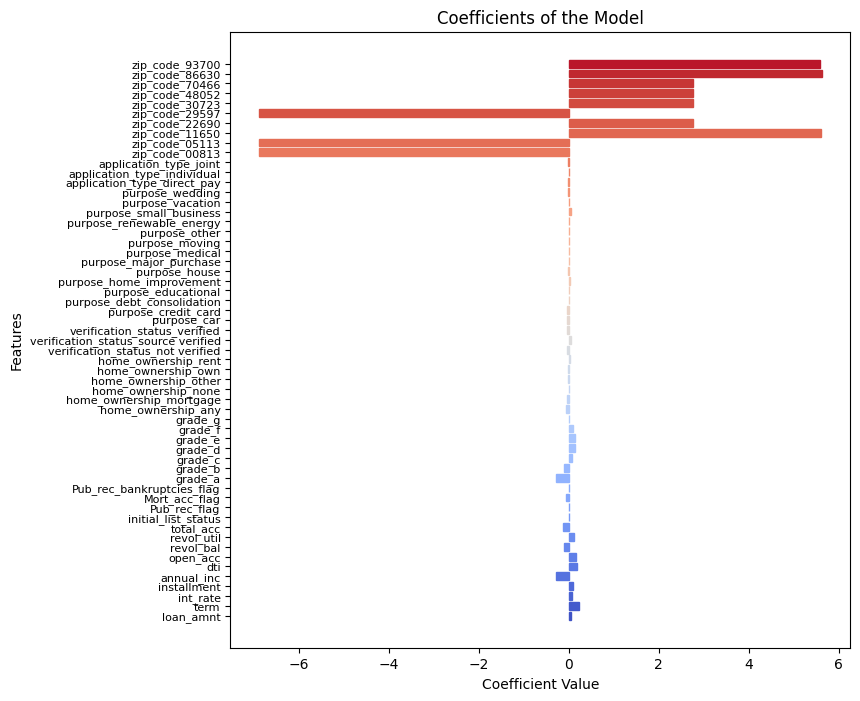

In [ ]:
# Accessing coefficients and feature names
coefficients = model.coef_[0]
feature_names = X.columns

# Create a DataFrame with feature names and coefficients
data = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Define a color palette
custom_palette = sns.color_palette("coolwarm", len(data))

# Plotting coefficients with custom color palette
plt.figure(figsize=(8, 8))
bars = plt.barh(data['Feature'], data['Coefficient'], color=custom_palette)
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Coefficients of the Model')
plt.yticks(fontsize=8)
# Assigning custom colors to bars
for bar, color in zip(bars, custom_palette):
    bar.set_color(color)

plt.show()

-->The model has assinged large weightage to zip_code features followed by term,dti,open_acc,loan_amnt

-->simillarly,large negative coefficients are assigned to a few zip-codes ,followed by annual income and joint application type

**--Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87     51394
           1       0.48      0.81      0.61     12051

    accuracy                           0.80     63445
   macro avg       0.72      0.80      0.74     63445
weighted avg       0.86      0.80      0.82     63445



From above classification report,

1)Class 0 (Fully Paid): The precision, which measures the accuracy of positive predictions for fully paid loans, is 95%. The recall, which quantifies the ability to identify fully paid loans among the actual fully paid cases, stands at 80%. The F1-score, a balance between precision and recall, is reported as 87% for fully paid loans.

2)Class 1 (Charged Off): Precision for identifying charged off loans is 48%, signifying the accuracy of positive predictions for charged off cases. The recall for classifying actual charged off loans among all charged off instances is 81%. The F1-score, an overall measure of a classifier's accuracy for charged off loans, is 61%.

3)Overall Accuracy: The total accuracy of the classification model across both fully paid and charged off loans is 80%.

# **ROC & AUC Curve**

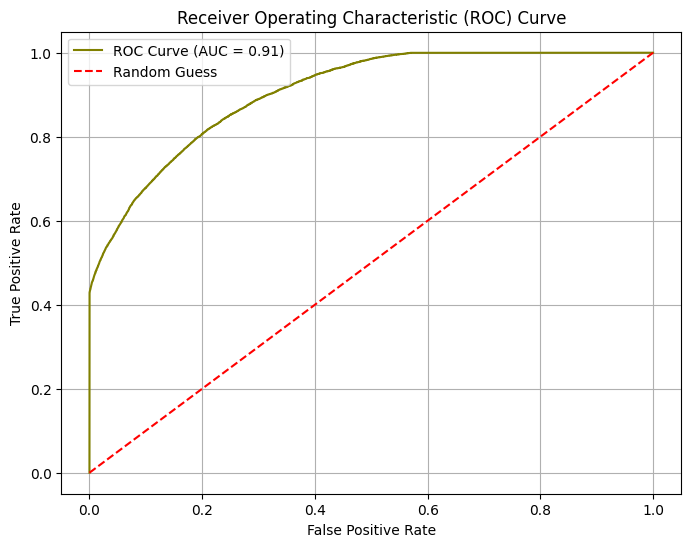

In [ ]:
#predict probabilities for the test data
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_prob = model.predict_proba(X_test)[:, 1]
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC score
auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})',color='Olive')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess',color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

From above plot we observed,

**1.AUC-ROC in Imbalanced Data:**
* A high AUC-ROC (Area Under the Curve - Receiver Operating Characteristic) value (e.g., 0.91) indicates good overall class separation ability based on predicted probabilities.
*  However, in imbalanced data, where one class dominates, AUC-ROC might misrepresent model performance by favoring the majority class.

**2.Precision-Recall Curve's Relevance:**

*   Precision-Recall curves and metrics are preferred for imbalanced data.
*   They highlight the model's accuracy in predicting the minority (positive) class, offering a better understanding of its performance regarding rare instances.


**Precision-Recall Curve**

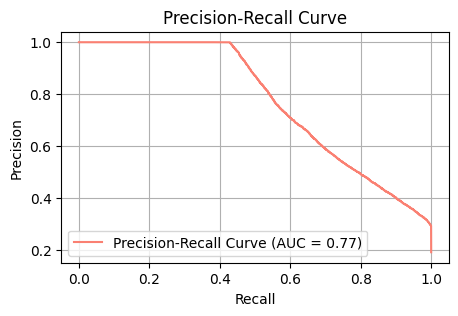

In [ ]:
from sklearn.metrics import precision_recall_curve,auc
# Calculate Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Calculate AUC for Precision-Recall curve
auc_score = auc(recall, precision)

# Plot Precision-Recall curve
plt.figure(figsize=(5, 3))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_score:.2f})',color='Salmon')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


"The AUC (Area Under Curve) of 0.77 indicates a reasonably good model performance as it's greater than 0.5, suggesting that the classifier is learning and distinguishing between classes. However, there is still room for improvement to achieve higher predictive accuracy."

**Tradeoff Questions:**

1)How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.

2)Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone


**Detecting Real Defaulters while Reducing False Positives:**

-->Enhanced Modeling and Data: Incorporate diverse data sources for a holistic borrower profile, using advanced modeling techniques to capture intricate patterns.

-->Precision-Recall Balance: Optimize the model's parameters to focus on precision or recall based on risk appetite, employing threshold tuning for a better balance.

**Mitigating NPA Risks by Playing Safe:**

-->Stricter Approval Criteria: Set stringent thresholds for credit scores, income stability, and financial behavior to prioritize low-risk applicants.

-->Continuous Adaptation: Implement ongoing monitoring systems to adapt to changing market conditions and borrower behaviors, ensuring proactive risk management.

**INSIGHTS**

**Impactful Factors on Loan Status:**

1)Loan Term Impact: Loans with a 36-month term are more likely to be fully paid, while 60-month term loans tend to have a higher incidence of being charged off.

2)Grade Impact: Higher-grade loans exhibit lower rates of being charged off compared to lower-grade loans.

3)Home Ownership Influence: Individuals categorized as 'None' or 'Renters' have a higher probability of experiencing loan charge-offs.

4)Loan Purpose Impact: Loans allocated for 'Small Business' purposes have a higher likelihood of being charged off.

5)Application Type Impact: Loans categorized under the 'Direct Pay' application type show a higher tendency to be charged off.

**Model Performance:**

-->The logistic regression model achieved an accuracy of approximately 89.2% on the test set, indicating a reasonably good performance.

-->However, considering the imbalanced nature of the data, precision-recall metrics are more insightful. The precision for fully paid loans is 95%, while for charged-off loans, it's 48%.

**Feature Importance:**

-->The model assigns high weightage to features such as zip code, loan term, debt-to-income ratio (dti), open accounts (open_acc), and loan amount (loan_amnt).

-->Similarly, it assigns large negative coefficients to certain zip codes, annual income, and joint application types.

**Recommendations:**

1)Risk Mitigation Strategies: Focus on higher-grade loans, shorter loan terms, and scrutinizing loan purposes, particularly for small business loans, to minimize charge-offs.

2)Targeted Decision-Making: Consider additional data sources or features related to employment details, geographic location, or specific loan purposes to enhance predictive capabilities.

3)Continuous Model Improvement: Explore advanced modeling techniques like ensemble methods or tree-based models to improve classification performance, especially for identifying charged-off loans.